<a href="https://colab.research.google.com/github/en-genius/Artificial-Intelligence-in-Medicine/blob/main/CERVICAL_CANCER_DETECTION_VIA_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<center>CLASSIFICATION OF LIQUID BASED CERVICAL CYTOLOGY IMAGES USING DEEP LEARNING</center>

##OBJECTIVE
The objective of this project is classify digital liquid based cytology
cervical images using deep learning. 

##INTRODUCTION
According to the World Health Organization, Cervical cancer is the fourth most frequent cause of cancer in women.
There were an estimated 342,000 deaths in 2020 with majority taking place in low and middle income countries.95% of cases are due to infection by the human papilloma virus. The burden of the disease can be effectively reduced following large scale vaccination programmes, early screening and treatment. 

######**ARTIFICIAL INTELLIGENCE IN O&G**

Artificial intelligence can be defined as the science of making intelligent machines. It is a field of endeavor that essentially strives to inculcate into computers the ability to perform tasks that would ordinarily require human intuition and cognition. It is subdivided into two components namely; machine learning and deep learning. 

The branch of deep learning that utilizes convolutional neural networks to obtain meaningful insight from visual inputs such as image or videos is referred to as Computer Vision. The task of assembling a new convolutional neural network can be described as being more of an art than science and often involves repeated cycles of diligent experimentation and evaluation. 

Interestingly, one of the many high performance convolutional neural network architectures can be utilized as a template for building a model on custom data instead of re-inventing the wheel. This technique is called transfer learning, and it involves the re-purposing of a model that has been trained on a particular task to a closely related one.

##DATA SOURCE
The dataset for this project was obtained from: https://data.mendeley.com/datasets/zddtpgzv63/1

##FURTHER READING
For more information about the application of artificial intelligence in the field of medicine,check out my book titled **Frontiers of 21st Century Medicine by Dr Anthony Ukwenya** via the link:
https://www.amazon.com/Frontiers-21st-Century-Medicine-Intelligence-ebook/dp/B09MSW84DS

<br />
<br />

##TABLE OF CONTENT


1. Import the prerequisite modules  
2. Data Exploration and Analysis
3. Data processing and Augmentation
4. Modelling via Transfer Learning
5. Model Evaluation
6. Conclusion
7. Author
8. Credits



##IMPORT THE PREREQUISITE MODULES 

In [8]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')
import matplotlib.pyplot as plt
import cv2
import os
import random
from shutil import copyfile
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
import urllib.request


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##DATA EXPLORATION AND ANALYSIS

In [2]:
base_dir='/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer'
print(os.listdir(base_dir))

['High squamous intra-epithelial lesion', 'Low squamous intra-epithelial lesion', 'Negative for Intraepithelial malignancy', 'Squamous cell carcinoma']


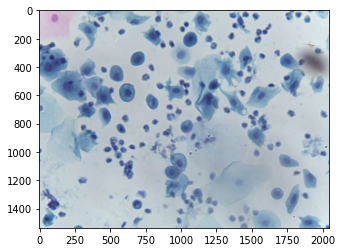

In [4]:
#Read a random image from the High squamous intra-epithelial lesion(HSIL) folder
image1 = cv2.imread('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/High squamous intra-epithelial lesion/HSIL_1 (1).jpg')
HSIL_image_number_1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(HSIL_image_number_1)

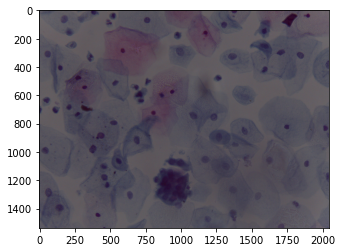

In [6]:
#Read a random image from the Low squamous intra-epithelial(LSIL) lesion folder
image2 = cv2.imread('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Low squamous intra-epithelial lesion/LSIL_1 (10).jpg')
LSIL_image_number_10 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(LSIL_image_number_10)

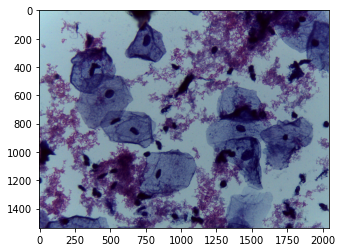

In [11]:
#Read a random image from the normal folder
image3 = cv2.imread('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Negative for Intraepithelial malignancy/NL_10_ (11).jpg')
normal_image_number_11 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(normal_image_number_11)

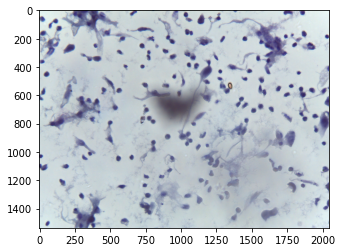

In [13]:
#Read a random image from the squamous cell carcinoma(SCC) folder
image4 = cv2.imread('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Squamous cell carcinoma/SCC_4 (1).jpg')
squamous_cell_carcinoma_image_number_15 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
plt.imshow(squamous_cell_carcinoma_image_number_15)

In [14]:
# Number of images in the high squamous intra-epithelial lesion, low squamous intra-epithelial lesion, negative for intraepithelial malignancy and squamous cell carcinoma folders
# NB: There is class imbalance which might affect reliability of the model's accuracy
print('The number of high squamous intra-epithelial lesion images are:',len(os.listdir('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/High squamous intra-epithelial lesion')))
print('The number of low squamous intra-epithelial lesion images are:',len(os.listdir('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Low squamous intra-epithelial lesion')))
print('The number of normal images are:',len(os.listdir('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Negative for Intraepithelial malignancy')))
print('The number of squamous cell carcinoma images are:',len(os.listdir('/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Squamous cell carcinoma')))


The number of high squamous intra-epithelial lesion images are: 163
The number of low squamous intra-epithelial lesion images are: 113
The number of normal images are: 613
The number of squamous cell carcinoma images are: 74


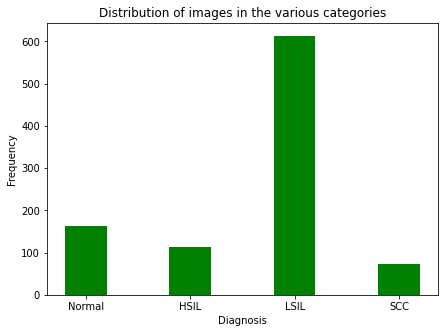

In [15]:
# Visualizing the number of images in all the folders folders
data = {'Normal':163, 'HSIL':113, 'LSIL':613, 'SCC':74 }
diagnosis = list(data.keys())
frequency = list(data.values())
fig = plt.figure(figsize = (7, 5))
plt.bar(diagnosis, frequency, color ='green',width = 0.4)
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")
plt.title("Distribution of images in the various categories")
plt.show()

In [18]:
#label new folders inorder to split the image dataset into training and testing folders
main_folder = '/content/drive/MyDrive/new-cervical-cancer-folder'
training_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/training'
testing_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/testing'
HSIL_training_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/training/HSIL'
LSIL_training_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/training/LSIL'
NORM_training_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/training/NORM'
SCC_training_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/training/SCC'
HSIL_testing_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/HSIL'
LSIL_testing_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/LSIL'
NORM_testing_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/NORM'
SCC_testing_folder = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/SCC'

#Create the designated folders
os.mkdir(main_folder)
os.mkdir(training_folder)
os.mkdir(testing_folder)
os.mkdir(HSIL_training_folder)
os.mkdir(LSIL_training_folder)   
os.mkdir(NORM_training_folder)
os.mkdir(SCC_training_folder)
os.mkdir(LSIL_testing_folder)
os.mkdir(NORM_testing_folder)
os.mkdir(SCC_testing_folder)
os.mkdir(HSIL_testing_folder)


In [19]:
#Create a function that will split image files in the original dataset into training and testing folders 

def split_image_data(source, train, test, split_ratio):
    image_files = []
    for image_file_name in os.listdir(source):
        file = source + image_file_name
        if os.path.getsize(file) > 0:
            image_files.append(image_file_name)
        else:
            print(image_file_name + " is invalid")

    image_training_length = int(len(image_files) * split_ratio)
    image_testing_length = int(len(image_files) - image_training_length)
    shuffled_image_set = random.sample(image_files, len(image_files))
    shuffled_training_set = shuffled_image_set[0:image_training_length]
    shuffled_testing_set = shuffled_image_set[image_training_length:]
    
    for image in shuffled_training_set:
          origin = source + image
          destination_folder = train + image
          copyfile(origin, destination_folder)

    for image in shuffled_testing_set:
          origin = source + image
          destination_folder = test + image
          copyfile(origin, destination_folder)

In [20]:
#Get the path of the newly created folders
NORM_image_dir = '/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Negative for Intraepithelial malignancy/'
training_NORM_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/training/NORM/'
testing_NORM_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/NORM/'
HSIL_image_dir = '/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/High squamous intra-epithelial lesion/'
training_HSIL_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/training/HSIL/'
testing_HSIL_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/HSIL/'
LSIL_image_dir = '/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Squamous cell carcinoma/'
training_LSIL_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/training/LSIL/'
testing_LSIL_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/LSIL/'
SCC_image_dir = '/content/drive/MyDrive/Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer/Squamous cell carcinoma/'
training_SCC_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/training/SCC/'
testing_SCC_dir = '/content/drive/MyDrive/new-cervical-cancer-folder/testing/SCC/'

In [21]:
#Execute the split function via the split ratio of choice
split_ratio = 0.8
split_image_data(NORM_image_dir, training_NORM_dir, testing_NORM_dir, split_ratio)
split_image_data(HSIL_image_dir, training_HSIL_dir, testing_HSIL_dir, split_ratio)
split_image_data(LSIL_image_dir, training_LSIL_dir, testing_LSIL_dir, split_ratio)
split_image_data(SCC_image_dir, training_SCC_dir, testing_SCC_dir, split_ratio)


##DATA PROCESSING AND AUGMENTATION

In [22]:
#Augment data via ImageDataGenerator to checkmate class imbalance and increase dataset size
training_set_generator = ImageDataGenerator(
      rescale = 1/255,
      validation_split = 0.2
    )
train_images = training_set_generator.flow_from_directory(training_folder,
                                                          batch_size=100,
                                                          class_mode='categorical', 
                                                          target_size=(120, 120))


testing_set_datagen = ImageDataGenerator(
    rescale = 1/255
    )
test_images = testing_set_datagen.flow_from_directory(testing_folder,
                                                              batch_size=100,
                                                              class_mode='categorical',
                                                              target_size=(120, 120))



Found 737 images belonging to 4 classes.
Found 186 images belonging to 4 classes.


In [23]:
#Obtain inceptionv3 model for transfer learning
pretrained_weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights = "inception_v3.h5"
urllib.request.urlretrieve(pretrained_weights_url, weights)

#instantiate the model following retrieval
pretrained_inceptionV3_model = InceptionV3(input_shape=(120, 120, 3),
                                include_top=False,
                                weights=None)
pretrained_inceptionV3_model.load_weights(weights)

for layer in pretrained_inceptionV3_model.layers:
    layer.trainable = False

layer = pretrained_inceptionV3_model.get_layer('mixed7')
last_output = layer.output

In [24]:
# Create new layers and add to the preexisting architecture 
layer1 = layers.Flatten()(last_output)
layer2 = layers.Dense(4000, activation='relu')(layer1)
layer3 = layers.Dense(4000, activation='relu')(layer2)
layer4 = layers.Dense(400, activation='relu')(layer3)
layer5 = layers.Dense(40, activation='relu')(layer4)
layer6 = layers.Dense(4, activation='sigmoid')(layer5)

model = Model(pretrained_inceptionV3_model.input, layer6)


##MODELLING

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 59, 59, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 59, 59, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [26]:
#Compile the model 
model.compile(optimizer=RMSprop(),
              loss='binary_crossentropy',
              metrics=['acc'])
#Fit the model
history = model.fit(
            train_images,
            validation_data = test_images,
            epochs=25,
            verbose=1)

Epoch 1/25
8/8 [==============================] - 135s 16s/step - loss: 32.0419 - acc: 0.6119 - val_loss: 0.5537 - val_acc: 0.4946
Epoch 2/25
8/8 [==============================] - 115s 14s/step - loss: 0.6146 - acc: 0.5577 - val_loss: 0.3630 - val_acc: 0.6613
Epoch 3/25
8/8 [==============================] - 115s 14s/step - loss: 0.3158 - acc: 0.6703 - val_loss: 0.3105 - val_acc: 0.7151
Epoch 4/25
8/8 [==============================] - 121s 16s/step - loss: 0.3194 - acc: 0.6662 - val_loss: 0.3246 - val_acc: 0.7204
Epoch 5/25
8/8 [==============================] - 116s 15s/step - loss: 0.3291 - acc: 0.6608 - val_loss: 0.2777 - val_acc: 0.8118
Epoch 6/25
8/8 [==============================] - 115s 14s/step - loss: 0.2271 - acc: 0.7924 - val_loss: 0.3431 - val_acc: 0.6344
Epoch 7/25
8/8 [==============================] - 115s 14s/step - loss: 0.3114 - acc: 0.7286 - val_loss: 0.2953 - val_acc: 0.7043
Epoch 8/25
8/8 [==============================] - 115s 14s/step - loss: 0.2533 - acc: 0.7

##MODEL EVALUATION

In [27]:
#Check the accuracy of the model
test_accuracy = history.history['val_acc']
test_accuracy

[0.49462366104125977,
 0.6612903475761414,
 0.7150537371635437,
 0.7204301357269287,
 0.8118279576301575,
 0.6344085931777954,
 0.7043010592460632,
 0.6612903475761414,
 0.7419354915618896,
 0.8387096524238586,
 0.8494623899459839,
 0.8602150678634644,
 0.8655914068222046,
 0.8118279576301575,
 0.8763440847396851,
 0.7849462628364563,
 0.8548387289047241,
 0.8440860509872437,
 0.6612903475761414,
 0.8387096524238586,
 0.8602150678634644,
 0.7634408473968506,
 0.8279569745063782,
 0.8655914068222046,
 0.8440860509872437]

In [28]:
#Save and download the model
model.save('my_CC_model.h5')
files.download('my_CC_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##CONCLUSION
The highest accuracy obtained from testing was 87.6% which is reasonably good. 

##AUTHOR

Anthony Ukwenya

##CREDITS

1. Deep Learning for Computer Vision by Jason Brownlee.
2. Deep Learning with Python by Francois Chollet.
3. Hands on Machine Learning with ScikitLearn, Keras and Tensorflow by Aurelien Geron.
4. Advanced Computer Vision with Tensorflow (Coursera).
5. AI for Medicine Specialization (Coursera).
6. Python for Computer Vision by Jose Portilla (Udemy).
7. hussain, elima; Mahanta, Lipi B.; Borah, Himakshi; Ray Das, Chandana (2019), “Liquid based cytology pap smear images for multi-class diagnosis of cervical cancer”, Mendeley Data, V1, doi: 10.17632/zddtpgzv63.1
